In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from torch.utils.data import Dataset, DataLoader
import torch
from utils import id_to_label

In [16]:
train_df = pd.read_csv('train.csv')
train_df

,image_path,label
0,train/n03976657/images/n03976657_0.JPEG,n03976657
1,train/n03976657/images/n03976657_1.JPEG,n03976657
2,train/n03976657/images/n03976657_10.JPEG,n03976657
3,train/n03976657/images/n03976657_100.JPEG,n03976657
4,train/n03976657/images/n03976657_101.JPEG,n03976657
...,...,...
49995,train/n02233338/images/n02233338_95.JPEG,n02233338
49996,train/n02233338/images/n02233338_96.JPEG,n02233338
49997,train/n02233338/images/n02233338_97.JPEG,n02233338
49998,train/n02233338/images/n02233338_98.JPEG,n02233338


In [17]:
from dataset import TinyImagenet

train_dataset = TinyImagenet(train_df, triplet=True)

In [18]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=1, pin_memory=True)
len(train_loader)

12500

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
tensor([52, 94, 85, 35])


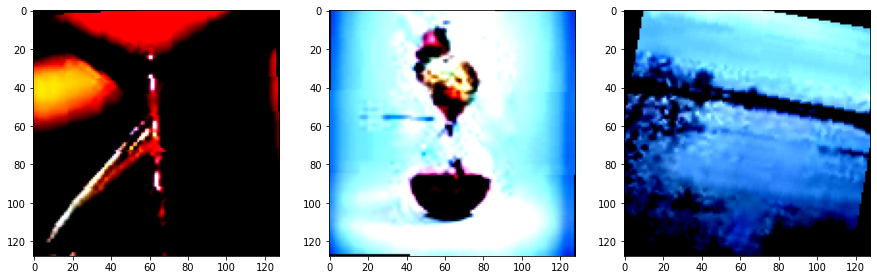

n03544143


In [23]:
for anchor, pos, neg, label in train_loader:
    print(anchor.shape)
    print(pos.shape)
    print(neg.shape)
    print(label)

    plt.figure(figsize=(15, 6))
    plt.subplot(131)
    plt.imshow(anchor[0].permute(1,2,0))
    plt.subplot(132)
    plt.imshow(pos[0].permute(1,2,0))
    plt.subplot(133)
    plt.imshow(neg[0].permute(1,2,0))
    plt.show()
    print(id_to_label(label[0].item()))
    break

In [17]:
id = 1
anchor, label = train_dataset[id]

print(anchor.shape)
# print(positive.shape)
print(label)

TypeError: Input tensor should be a float tensor. Got torch.uint8.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


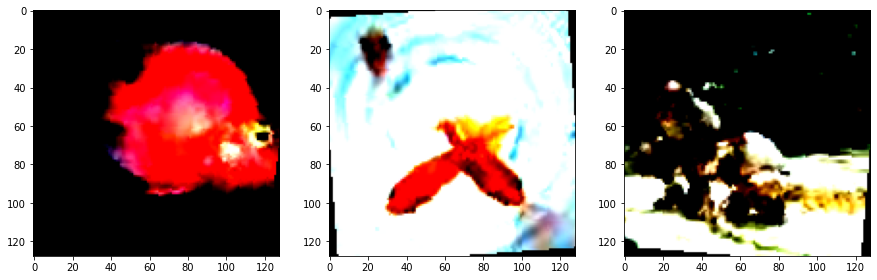

In [13]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.imshow(anchor.permute(1,2,0))
plt.subplot(132)
plt.imshow(positive.permute(1,2,0))
plt.subplot(133)
plt.imshow(negative.permute(1,2,0))
plt.show()